In [ ]:
pip install pennylane

In [ ]:
# import pennylane as qml
# from pennylane import numpy as np
# from pennylane.templates import RandomLayers
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline

# from tqdm import tqdm, trange

In [ ]:
import numpy as np

In [ ]:
n_epochs = 100   # Number of optimization epochs
n_layers = 1    # Number of random layers
n_train = 1000    # Size of the train dataset
n_test = int(0.6 * n_train)     # Size of the test dataset

SAVE_PATH = "quanvolution/" # Data saving folder
PREPROCESS = True           # If False, skip quantum processing and load data from SAVE_PATH
# np.random.seed(0)           # Seed for NumPy random number generator
# tf.random.set_seed(0)       # Seed for TensorFlow random number generator

In [ ]:
# def train_sample(train_images, train_labels, n_train):
#     train_idxs = np.random.choice(range(len(train_images)), n_train, replace=False)
#     train_images_sample = []
#     train_labels_sample = []
#     for i in train_idxs:
#         train_images_sample.append(train_images[i])
#         train_labels_sample.append(train_labels[i])
    
#     return np.array(train_images_sample), np.array(train_labels_sample)

In [ ]:
# def test_sample(test_images, test_labels, n_test):
#     test_idxs = np.random.choice(range(len(test_images)), n_test, replace=False)
#     test_images_sample = []
#     test_labels_sample = []
#     for i in test_idxs:
#         test_images_sample.append(test_images[i])
#         test_labels_sample.append(test_labels[i])
    
#     return np.array(test_images_sample), np.array(test_labels_sample)

In [ ]:
# dev = qml.device("default.qubit", wires=4)
# # Random circuit parameters
# rand_params = np.random.uniform(high=2 * np.pi, size=(n_layers, 4))

# @qml.qnode(dev)
# def circuit(phi):
#     # Encoding of 4 classical input values
#     for j in range(4):
#         qml.RY(np.pi * phi[j], wires=j)

#     # Random quantum circuit
#     RandomLayers(rand_params, wires=list(range(4)))

#     # Measurement producing 4 classical output values
#     return [qml.expval(qml.PauliZ(j)) for j in range(4)]


In [ ]:
# dev4 = qml.device("default.qubit", wires=16)

# # Random circuit parameters
# rand_params4 = np.random.uniform(high=2*np.pi, size=(n_layers, 16))
    
# @qml.qnode(dev4)
# def circuit4(phi, rand_params4):
#     # Encoding of 16 classical input values
#     for j in range(16):
#         qml.RY(np.pi * phi[j], wires=j)

#     # Random quantum circuit
#     RandomLayers(rand_params4, wires=list(range(16)))

#     # Measurement producing 4 classical output values
#     return [qml.expval(qml.PauliZ(j)) for j in range(16)]

In [ ]:
# def quanv(image, rand_params):
#     """Convolves the input image with many applications of the same quantum circuit."""
#     out = np.zeros((14, 14, 4))

#     # Loop over the coordinates of the top-left pixel of 2x2 squares
#     for j in range(0, 28, 2):
#         for k in range(0, 28, 2):
#             # Process a squared 2x2 region of the image with a quantum circuit
#             q_results = circuit(
#                 [
#                     image[j, k, 0],
#                     image[j, k + 1, 0],
#                     image[j + 1, k, 0],
#                     image[j + 1, k + 1, 0]
#                 ],
#                 rand_params
#             )
#             # Assign expectation values to different channels of the output pixel (j/2, k/2)
#             for c in range(4):
#                 out[j // 2, k // 2, c] = q_results[c]
    
#     return out

In [ ]:
# def quanv4(image, rand_params):
#     """Convolves the input image with many applications of the same quantum circuit."""
#     out = np.zeros((7, 7, 16))

#     # Loop over the coordinates of the top-left pixel of 2x2 squares
#     for j in range(0, 28, 4):
#         for k in range(0, 28, 4):
#             # Process a squared 2x2 region of the image with a quantum circuit
#             weights = [
#                     image[j, k, 0],
#                     image[j, k + 1, 0],
#                     image[j, k + 2, 0],
#                     image[j, k + 3, 0],
#                     image[j + 1, k, 0],
#                     image[j + 1, k + 1, 0],
#                     image[j + 1, k + 2, 0],
#                     image[j + 1, k + 3, 0],
#                     image[j + 2, k, 0],
#                     image[j + 2, k + 1, 0],
#                     image[j + 2, k + 2, 0],
#                     image[j + 2, k + 3, 0],
#                     image[j + 3, k, 0],
#                     image[j + 3, k + 1, 0],
#                     image[j + 3, k + 2, 0],
#                     image[j + 3, k + 3, 0]
#                 ]
#             q_results = circuit4(weights, rand_params)
#             # print(qml.draw(circuit4, expansion_strategy="device")(weights))
#             # Assign expectation values to different channels of the output pixel (j/2, k/2)
#             for c in range(16):
#                 out[j // 4, k // 4, c] = q_results[c]
    
#     return out

# preprocessing

In [ ]:
fashion_mnist_dataset = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = mnist_dataset.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
mnist_dataset = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist_dataset.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [ ]:
cifer_dataset = keras.datasets.cifar10
(train_images, train_labels), (test_images, test_labels) = cifer_dataset.load_data()

In [ ]:
# mnist_dataset = keras.datasets.mnist
# (train_images, train_labels), (test_images, test_labels) = mnist_dataset.load_data()

# Reduce dataset size
train_images = train_images[:n_train]
train_labels = train_labels[:n_train]
test_images = test_images[:n_test]
test_labels = test_labels[:n_test]

# Normalize pixel values within 0 and 1
train_images = train_images / 255
test_images = test_images / 255

# Add extra dimension for convolution channels
train_images = np.array(train_images[..., tf.newaxis])
test_images = np.array(test_images[..., tf.newaxis])

In [ ]:
train_labels.shape

(1000,)

In [ ]:
train_images.shape

(1000, 28, 28, 1)

In [ ]:
# dataset_name = "fashion"
# q_train_images_filename = SAVE_PATH + dataset_name + "_layers_" + str(n_layers) + "_train_" + str(n_train) + "_test_" + str(n_test) + "_q_train_images.npy"
# q_test_images_filename = SAVE_PATH + dataset_name + "_layers_" + str(n_layers) + "_train_" + str(n_train) + "_test_" + str(n_test) + "_q_test_images.npy"

# if PREPROCESS:
#     print("Quantum pre-processing of train images:")
#     q_train_images = []
#     for idx in trange(len(train_images)):
#         img = train_images[idx]
#         q_train_images.append(quanv4(img, rand_params4)) # changed to quanv4
#     q_train_images = np.asarray(q_train_images)

#     print("\nQuantum pre-processing of test images:")
#     q_test_images = []
#     for idx in trange(len(test_images)):
#         img = test_images[idx]
#         q_test_images.append(quanv4(img, rand_params4)) # changed to quanv4
#     q_test_images = np.asarray(q_test_images)

#     # Save pre-processed images
#     np.save(q_train_images_filename, q_train_images)
#     np.save(q_test_images_filename, q_test_images)


In [ ]:
# Load pre-processed images
q_train_images = np.load("/content/fashion_train_10000_test_6000_q_train_images.npy")
q_test_images = np.load("/content/fashion_train_10000_test_6000_q_test_images.npy")

In [ ]:
q_train_images.shape

(10000, 14, 14, 4)

In [ ]:
# # Load pre-processed images
# q_train_images = np.load("/content/cifar_layers_1_kernel_4_train_1000_test_600_q_train_images.npy")
# q_test_images = np.load("/content/cifar_layers_1_kernel_4_train_1000_test_600_q_test_images.npy")

In [ ]:
q_train_images.shape

(10000, 14, 14, 4)

In [ ]:
# if torch.cuda.is_available():
#     q_train_images.cuda()
#     q_test_images.cuda()

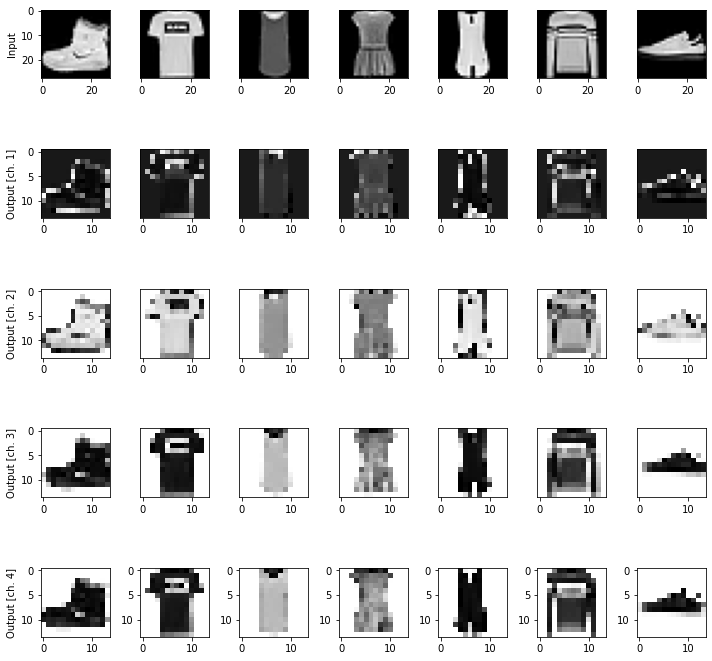

In [ ]:
n_samples = 7
n_channels = 4
fig, axes = plt.subplots(1 + n_channels, n_samples, figsize=(10, 10))
for k in range(n_samples):
    axes[0, 0].set_ylabel("Input")
    if k != 0:
        axes[0, k].yaxis.set_visible(False)
    axes[0, k].imshow(train_images[k, :, :, 0], cmap="gray")

    # Plot all output channels
    for c in range(n_channels):
        axes[c + 1, 0].set_ylabel("Output [ch. {}]".format(c+1))
        if k != 0:
            axes[c, k].yaxis.set_visible(False)
        axes[c + 1, k].imshow(q_train_images[k, :, :, c], cmap="gray")

plt.tight_layout()
plt.show()

In [ ]:
# def MyModel():
#     """Initializes and returns a custom Keras model
#     which is ready to be trained."""
#     model = keras.models.Sequential([
#         keras.layers.Flatten(),
#         keras.layers.Dense(10, activation="softmax")
#     ])

#     model.compile(
#         optimizer="adam",
#         loss="sparse_categorical_crossentropy",
#         metrics=["accuracy"],
#     )
    
#     return model

In [ ]:
train_labels.shape

(1000, 1)

In [ ]:
test_labels.shape

(600, 1)

In [ ]:
q_train_images.shape

(1000, 8, 8, 3, 16)

In [ ]:
train_labels.shape

(1000, 1)

In [ ]:
q_test_images.shape

(600, 8, 8, 3, 16)

In [ ]:
q_train_images.shape[:2]

(1000, 8)

In [ ]:
import torch

def magic_combine(x, dim_begin, dim_end):
    combined_shape = list(x.shape[:dim_begin]) + [-1] + list(x.shape[dim_end:])
    return x.reshape(combined_shape)

In [ ]:
q_train_images = magic_combine(q_train_images, 3, 5)
q_test_images = magic_combine(q_test_images, 3, 5)

In [ ]:
q_train_images.shape

(1000, 8, 8, 48)

In [ ]:
# q_model = MyModel()

# q_history = q_model.fit(
#     q_train_images,
#     train_labels,
#     validation_data=(q_test_images, test_labels),
#     batch_size=10,
#     epochs=n_epochs,
#     verbose=2,
# )

Epoch 1/100
100/100 - 3s - loss: 2.2055 - accuracy: 0.2430 - val_loss: 2.1685 - val_accuracy: 0.2583 - 3s/epoch - 30ms/step
Epoch 2/100
100/100 - 0s - loss: 1.6880 - accuracy: 0.4320 - val_loss: 2.1913 - val_accuracy: 0.3133 - 246ms/epoch - 2ms/step
Epoch 3/100
100/100 - 0s - loss: 1.4451 - accuracy: 0.5060 - val_loss: 2.2725 - val_accuracy: 0.3083 - 240ms/epoch - 2ms/step
Epoch 4/100
100/100 - 0s - loss: 1.2488 - accuracy: 0.5940 - val_loss: 2.2805 - val_accuracy: 0.2700 - 253ms/epoch - 3ms/step
Epoch 5/100
100/100 - 0s - loss: 1.1587 - accuracy: 0.6200 - val_loss: 2.2454 - val_accuracy: 0.2967 - 251ms/epoch - 3ms/step
Epoch 6/100
100/100 - 0s - loss: 1.0276 - accuracy: 0.6600 - val_loss: 2.2353 - val_accuracy: 0.2850 - 272ms/epoch - 3ms/step
Epoch 7/100
100/100 - 0s - loss: 0.8989 - accuracy: 0.7290 - val_loss: 2.2983 - val_accuracy: 0.3117 - 260ms/epoch - 3ms/step
Epoch 8/100
100/100 - 0s - loss: 0.8179 - accuracy: 0.7560 - val_loss: 2.3214 - val_accuracy: 0.3283 - 300ms/epoch - 3ms

KeyboardInterrupt: ignored

In [ ]:
# c_model = MyModel()

# c_history = c_model.fit(
#     train_images,
#     train_labels,
#     validation_data=(test_images, test_labels),
#     batch_size=10,
#     epochs=n_epochs,
#     verbose=2,
# )

In [ ]:
# import standard PyTorch modules
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.tensorboard import SummaryWriter # TensorBoard support

# import torchvision module to handle image manipulation
import torchvision
import torchvision.transforms as transforms

# calculate train time, writing train data to files etc.
import time
import pandas as pd
import json
from IPython.display import clear_output

torch.set_printoptions(linewidth=120)
torch.set_grad_enabled(True)     # On by default, leave it here for clarity


In [ ]:
import torch
torch.cuda.is_available()

True

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
class LeNet5(nn.Module):

    def __init__(self, num_classes = 10, in_channels = 4):
        super(LeNet5, self).__init__()
        
        # self.grayscale = grayscale
        self.num_classes = num_classes

        # if self.grayscale:
        #     in_channels = 1
        # else:
        #     in_channels = 3

        self.features = nn.Sequential(
            
            nn.Conv2d(in_channels, 6*in_channels, kernel_size=5),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
            nn.Conv2d(6*in_channels, 16*in_channels, kernel_size=5),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
        )

        self.classifier = nn.Sequential(
            nn.Linear(16*5*5*in_channels, 1024*in_channels),
            nn.ReLU(),
            nn.Linear(1024*in_channels, 64*in_channels),
            nn.ReLU(),
            nn.Linear(64*in_channels, num_classes),
        )


    def forward(self, x):
        x = self.features(x)
        x = torch.flatten(x, 1)
        logits = self.classifier(x)
        probas = F.softmax(logits, dim=1)
        return logits, probas

In [ ]:
model = LeNet5(in_channels = 48)
num_params = sum(param.numel() for param in model.parameters() if param.requires_grad)
num_params

1100672554

In [ ]:
class q_LeNet5(nn.Module):

    def __init__(self, num_classes = 10, in_channels = 4):
        super(q_LeNet5, self).__init__()
        
        # self.grayscale = grayscale
        self.num_classes = num_classes

        # if self.grayscale:
        #     in_channels = 1
        # else:
        #     in_channels = 3

        self.features = nn.Sequential(
            
            nn.Conv2d(in_channels, 6*in_channels, kernel_size=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
            nn.Conv2d(6*in_channels, 16*in_channels, kernel_size=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )

        self.classifier = nn.Sequential(
            # nn.Linear(16*5*5*in_channels, 120*in_channels),
            nn.Linear(16*in_channels, 150*in_channels),
            nn.ReLU(),
            nn.Linear(150*in_channels, 128*in_channels),
            nn.ReLU(),
            nn.Linear(128*in_channels, num_classes),
        )


    def forward(self, x):
        # print('x shape',x.shape)
        x = self.features(x)
        # print('x shape',x.shape)
        x = torch.flatten(x, 1)
        # print('x shape',x.shape)
        logits = self.classifier(x)
        probas = F.softmax(logits, dim=1)
        return logits, probas

In [ ]:
model = q_LeNet5(in_channels = 48)
num_params = sum(param.numel() for param in model.parameters() if param.requires_grad)
num_params

50782282

In [ ]:
def compute_accuracy(model, data_loader, device):
    correct_pred, num_examples = 0, 0
    for i, (features, targets) in enumerate(data_loader):
            
        features = features.to(device)
        targets = targets.to(device)

        logits, probas = model(features)
        _, predicted_labels = torch.max(probas, 1)
        num_examples += targets.size(0)
        correct_pred += (predicted_labels == targets).sum()
    return correct_pred.float()/num_examples * 100

In [ ]:
def get_num_correct(preds, labels):
  return preds.argmax(dim=1).eq(labels).sum().item()

In [ ]:
# import modules to build RunBuilder and RunManager helper classes
from collections  import OrderedDict
from collections import namedtuple
from itertools import product

# Read in the hyper-parameters and return a Run namedtuple containing all the 
# combinations of hyper-parameters
class RunBuilder():
  @staticmethod
  def get_runs(params):

    Run = namedtuple('Run', params.keys())

    runs = []
    for v in product(*params.values()):
      runs.append(Run(*v))
    
    return runs

In [ ]:
# Helper class, help track loss, accuracy, epoch time, run time, 
# hyper-parameters etc. Also record to TensorBoard and write into csv, json
class RunManager():
  def __init__(self):

    # tracking every epoch count, loss, accuracy, time
    self.epoch_count = 0
    self.epoch_loss = 0
    self.epoch_num_correct = 0
    self.epoch_start_time = None

    # tracking every run count, run data, hyper-params used, time
    self.run_params = None
    self.run_count = 0
    self.run_data = []
    self.run_start_time = None

    # record model, loader and TensorBoard 
    self.network = None
    self.loader = None
    self.tb = None

  # record the count, hyper-param, model, loader of each run
  # record sample images and network graph to TensorBoard  
  def begin_run(self, run, network, loader):

    self.run_start_time = time.time()

    self.run_params = run
    self.run_count += 1

    self.network = network
    self.loader = loader
    self.tb = SummaryWriter(comment=f'-{run}')

    images, labels = next(iter(self.loader))
    images = magic_combine(images, 2, 5)
    grid = torchvision.utils.make_grid(images)

    # self.tb.add_image('images', grid)
    # self.tb.add_graph(self.network, images.to(device))

  # when run ends, close TensorBoard, zero epoch count
  def end_run(self):
    self.tb.close()
    self.epoch_count = 0

  # zero epoch count, loss, accuracy, 
  def begin_epoch(self):
    self.epoch_start_time = time.time()
    self.epoch_count += 1
    self.epoch_loss = 0
    self.epoch_num_correct = 0

  # 
  def end_epoch(self):
    # calculate epoch duration and run duration(accumulate)
    epoch_duration = time.time() - self.epoch_start_time
    run_duration = time.time() - self.run_start_time

    # record epoch loss and accuracy
    loss = self.epoch_loss / len(self.loader.dataset)
    accuracy = self.epoch_num_correct / len(self.loader.dataset)

    # Record epoch loss and accuracy to TensorBoard 
    self.tb.add_scalar('Loss', loss, self.epoch_count)
    self.tb.add_scalar('Accuracy', accuracy, self.epoch_count)

    # Record params to TensorBoard
    for name, param in self.network.named_parameters():
      self.tb.add_histogram(name, param, self.epoch_count)
      self.tb.add_histogram(f'{name}.grad', param.grad, self.epoch_count)
    
    # Write into 'results' (OrderedDict) for all run related data
    if self.epoch_count == 1 or self.epoch_count % 10 == 0:
        results = OrderedDict()
        results["run"] = self.run_count
        results["epoch"] = self.epoch_count
        results["loss"] = loss
        results["accuracy"] = accuracy
        results["epoch duration"] = epoch_duration
        results["run duration"] = run_duration

        with torch.set_grad_enabled(False): # save memory during inference
            results["test acc"] = compute_accuracy(model, test_loader, device).item()/100
        # Record hyper-params into 'results'
        for k,v in self.run_params._asdict().items(): results[k] = v
        self.run_data.append(results)
        df = pd.DataFrame.from_dict(self.run_data, orient = 'columns')

        # display epoch information and show progress
        clear_output(wait=True)
        display(df)

  # accumulate loss of batch into entire epoch loss
  def track_loss(self, loss):
    # multiply batch size so variety of batch sizes can be compared
    self.epoch_loss += loss.item() * self.loader.batch_size

  # accumulate number of corrects of batch into entire epoch num_correct
  def track_num_correct(self, preds, labels):
    self.epoch_num_correct += self._get_num_correct(preds, labels)

  @torch.no_grad()
  def _get_num_correct(self, preds, labels):
    return preds.argmax(dim=1).eq(labels).sum().item()
  
  # save end results of all runs into csv, json for further a
  def save(self, fileName):

    pd.DataFrame.from_dict(
        self.run_data, 
        orient = 'columns',
    ).to_csv(f'{fileName}.csv')

    with open(f'{fileName}.json', 'w', encoding='utf-8') as f:
      json.dump(self.run_data, f, ensure_ascii=False, indent=4)

# cifar

In [ ]:
# put all hyper params into a OrderedDict, easily expandable
params = OrderedDict(
    lr = [.001, 0.01],
    batch_size = [128, 256],
    shuffle = [False]
)
epochs = 100

In [ ]:
resize_transform = transforms.Compose([transforms.Resize((32, 32)),
                                       transforms.ToTensor()])

In [ ]:
# Use standard FashionMNIST dataset
FashionMINIST_train = torchvision.datasets.FashionMNIST(
    root = './data/FashionMNIST',
    train = True,
    download = True,
    # transform = transforms.Compose([
    #     transforms.ToTensor()                                 
    # ])
    transform=resize_transform
)

FashionMINIST_test = torchvision.datasets.FashionMNIST(
    root = './data/FashionMNIST',
    train = False,
    download = True,
    # transform = transforms.Compose([
    #     transforms.ToTensor()                                 
    # ])
    transform=resize_transform
)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/FashionMNIST/raw



In [ ]:
# Use standard FashionMNIST dataset
CIFAR10_train = torchvision.datasets.CIFAR10(
    root = './data/FashionMNIST',
    train = True,
    download = True,
    # transform = transforms.Compose([
    #     transforms.ToTensor()                                 
    # ])
    transform=resize_transform
)

CIFAR10_test = torchvision.datasets.CIFAR10(
    root = './data/FashionMNIST',
    train = False,
    download = True,
    # transform = transforms.Compose([
    #     transforms.ToTensor()                                 
    # ])
    transform=resize_transform
)

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
FashionMINIST_test = torch.utils.data.Subset(FashionMINIST_test, list(range(1,n_train)))
FashionMINIST_train = torch.utils.data.Subset(FashionMINIST_train, list(range(1,n_test)))

In [ ]:
CIFAR_test = torch.utils.data.Subset(CIFAR10_test, list(range(1,n_train)))
CIFAR_train = torch.utils.data.Subset(CIFAR10_train, list(range(1,n_test)))

In [ ]:
q_train_images = torch.tensor(q_train_images)
q_test_images = torch.tensor(q_test_images)

In [ ]:
import os
import pandas as pd
from torchvision.io import read_image

class Q_Dataset(torch.utils.data.Dataset):
    def __init__(self, q_train_images, img_labels):
        self.q_train_images = q_train_images
        self.img_labels = img_labels

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        image = torch.permute(self.q_train_images[idx], (2,1,0))
        label = torch.tensor(self.img_labels[idx])

        if torch.cuda.is_available():
            image.to(device)
            label.to(device)
        return image, label

In [ ]:
train_set = Q_Dataset(q_train_images, train_labels)

In [ ]:
test_set = Q_Dataset(q_test_images, test_labels)

In [ ]:
from torch.optim.lr_scheduler import ExponentialLR

In [ ]:
test_loader = torch.utils.data.DataLoader(test_set, batch_size = 1000)
m = RunManager()

# get all runs from params using RunBuilder class
for run in RunBuilder.get_runs(params):

    # if params changes, following line of code should reflect the changes too
    # model = Network(in_channels= 1, num_classes = 10)
    model = q_LeNet5(num_classes = 10, in_channels=48).double() 
    if torch.cuda.is_available():
        model.cuda()
    train_loader = torch.utils.data.DataLoader(train_set, batch_size = run.batch_size)
    optimizer = optim.Adam(model.parameters(), lr=run.lr)

    m.begin_run(run, model, train_loader)
    for epoch in range(epochs):
        m.begin_epoch()
        for batch in train_loader:
            images = batch[0].to(device)
            image = magic_combine(images, 3, 5)
            # images = images.to(DEVICE)
            labels = batch[1].to(device)
            # labels = labels.to(DEVICE)
            logits, preds = model(images)
            # preds = model(images)
            # loss = F.cross_entropy(preds, labels)
            loss = F.cross_entropy(logits, labels.squeeze(1))

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            m.track_loss(loss)
            m.track_num_correct(preds, labels)

        m.end_epoch()
    m.end_run()

# when all runs are done, save results to files
m.save('results')

,run,epoch,loss,accuracy,epoch duration,run duration,test acc,lr,batch_size,shuffle
0,1,1,2.559268,12.207,2.458918,2.470286,55.765005,0.001,128,False
1,1,10,1.217610,13.135,2.401963,82.442279,59.606665,0.001,128,False
2,1,20,0.426499,13.387,2.400699,170.834066,58.365000,0.001,128,False
3,1,30,0.009905,13.474,2.402463,258.739051,60.863335,0.001,128,False
4,1,40,0.000059,13.480,2.412586,347.230703,60.753335,0.001,128,False
5,1,50,0.000025,13.480,2.415898,435.340299,60.601670,0.001,128,False
6,1,60,0.000015,13.480,2.438396,523.930087,60.556665,0.001,128,False
7,1,70,0.000009,13.480,2.459923,612.835044,60.565000,0.001,128,False
8,1,80,0.000005,13.480,2.446365,702.676297,60.523335,0.001,128,False
9,1,90,0.000004,13.480,2.404526,791.526872,60.513335,0.001,128,False


In [ ]:
test_loader = torch.utils.data.DataLoader(CIFAR_test, batch_size = 1000)
m = RunManager()

# get all runs from params using RunBuilder class
for run in RunBuilder.get_runs(params):

    # if params changes, following line of code should reflect the changes too
    # model = Network(in_channels= 1, num_classes = 10)
    model = LeNet5(num_classes = 10, in_channels=3)
    if torch.cuda.is_available():
        model.cuda()

    # FashionMINIST_train.data.to(device)  # put data into GPU entirely
    # FashionMINIST_train.targets.to(device)
    
    train_loader = torch.utils.data.DataLoader(CIFAR_train, batch_size = run.batch_size)

    optimizer = optim.Adam(model.parameters(), lr=run.lr)
    # scheduler = ExponentialLR(optimizer, gamma=0.9)


    m.begin_run(run, model, train_loader)
    for epoch in range(epochs):
        m.begin_epoch()
        for batch in train_loader:
            images = batch[0].to(device)
            # images = images.to(DEVICE)
            labels = batch[1].to(device)
            # labels = labels.to(DEVICE)
            logits, preds = model(images)
            # preds = model(images)
            # loss = F.cross_entropy(preds, labels)
            loss = F.cross_entropy(logits, labels)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            # scheduler.step()

            m.track_loss(loss)
            m.track_num_correct(preds, labels)

        m.end_epoch()
    m.end_run()

# when all runs are done, save results to files
m.save('results')

,run,epoch,loss,accuracy,epoch duration,run duration,test acc,lr,batch_size,shuffle
0,1,1,2.455417,0.128548,0.113348,0.135221,0.089089,0.001,128,False
1,1,10,1.700764,0.422371,0.139281,7.931510,0.351351,0.001,128,False
2,1,20,0.896525,0.712855,0.136679,16.606088,0.368368,0.001,128,False
3,1,30,0.475644,0.848080,0.165101,25.175807,0.348348,0.001,128,False
4,1,40,0.100165,0.986644,0.155385,33.794744,0.353353,0.001,128,False
5,1,50,0.020854,1.000000,0.153220,42.368247,0.365365,0.001,128,False
6,1,60,0.020730,0.998331,0.140768,50.960552,0.370370,0.001,128,False
7,1,70,0.019900,0.998331,0.151366,59.577152,0.371371,0.001,128,False
8,1,80,0.002417,1.000000,0.153958,68.160736,0.379379,0.001,128,False
9,1,90,0.001615,1.000000,0.139169,76.746270,0.383383,0.001,128,False


# Fahsionminist

In [ ]:
# Load pre-processed images
q_train_images = np.load("/content/fashion_train_10000_test_6000_q_train_images.npy")
q_test_images = np.load("/content/fashion_train_10000_test_6000_q_test_images.npy")

TypeError: ignored

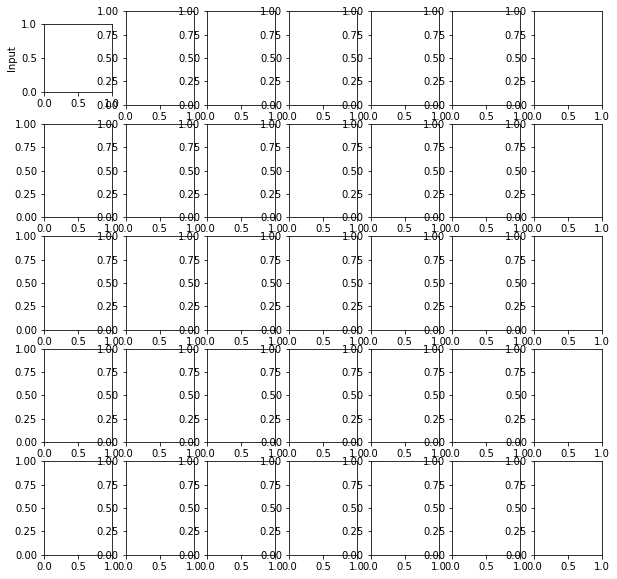

In [ ]:
n_samples = 7
n_channels = 4
fig, axes = plt.subplots(1 + n_channels, n_samples, figsize=(10, 10))
for k in range(n_samples):
    axes[0, 0].set_ylabel("Input")
    if k != 0:
        axes[0, k].yaxis.set_visible(False)
    axes[0, k].imshow(train_images[k, :, :, 0], cmap="gray")

    # Plot all output channels
    for c in range(n_channels):
        axes[c + 1, 0].set_ylabel("Output [ch. {}]".format(c))
        if k != 0:
            axes[c, k].yaxis.set_visible(False)
        axes[c + 1, k].imshow(q_train_images[k, :, :, c], cmap="gray")

plt.tight_layout()
plt.show()

In [ ]:
# Use standard FashionMNIST dataset
FashionMINIST_train = torchvision.datasets.FashionMNIST(
    root = './data/FashionMNIST',
    train = True,
    download = True,
    # transform = transforms.Compose([
    #     transforms.ToTensor()                                 
    # ])
    transform=resize_transform
)

FashionMINIST_test = torchvision.datasets.FashionMNIST(
    root = './data/FashionMNIST',
    train = False,
    download = True,
    # transform = transforms.Compose([
    #     transforms.ToTensor()                                 
    # ])
    transform=resize_transform
)

In [ ]:
FashionMINIST_test = torch.utils.data.Subset(FashionMINIST_test, list(range(1,n_train)))
FashionMINIST_train = torch.utils.data.Subset(FashionMINIST_train, list(range(1,n_test)))

In [ ]:
q_train_images = torch.tensor(q_train_images)
q_test_images = torch.tensor(q_test_images)

In [ ]:
train_set = Q_Dataset(q_train_images, train_labels)
test_set = Q_Dataset(q_test_images, test_labels)

In [ ]:
# put all hyper params into a OrderedDict, easily expandable
params = OrderedDict(
    lr = [.001, 0.01],
    batch_size = [128, 256, 512],
    shuffle = [False]
)
epochs = 100

In [ ]:
test_loader = torch.utils.data.DataLoader(FashionMINIST_test, batch_size = 1000)
m = RunManager()

# get all runs from params using RunBuilder class
for run in RunBuilder.get_runs(params):

    # if params changes, following line of code should reflect the changes too
    # model = Network(in_channels= 1, num_classes = 10)
    model = LeNet5(num_classes = 10, in_channels=1)
    if torch.cuda.is_available():
        model.cuda()

    # FashionMINIST_train.data.to(device)  # put data into GPU entirely
    # FashionMINIST_train.targets.to(device)
    
    train_loader = torch.utils.data.DataLoader(FashionMINIST_train, batch_size = run.batch_size)

    optimizer = optim.Adam(model.parameters(), lr=run.lr)
    # scheduler = ExponentialLR(optimizer, gamma=0.9)


    m.begin_run(run, model, train_loader)
    for epoch in range(epochs):
        m.begin_epoch()
        for batch in train_loader:
            images = batch[0].to(device)
            # images = images.to(DEVICE)
            labels = batch[1].to(device)
            # labels = labels.to(DEVICE)
            logits, preds = model(images)
            # preds = model(images)
            # loss = F.cross_entropy(preds, labels)
            loss = F.cross_entropy(logits, labels)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            # scheduler.step()

            m.track_loss(loss)
            m.track_num_correct(preds, labels)

        m.end_epoch()
    m.end_run()

# when all runs are done, save results to files
m.save('results')

,run,epoch,loss,accuracy,epoch duration,run duration,test acc,lr,batch_size,shuffle
0,1,1,2.444740,0.183639,0.082181,0.098437,0.299299,0.001,128,False
1,1,10,0.874261,0.694491,0.120215,2.639603,0.665666,0.001,128,False
2,1,20,0.647363,0.761269,0.122857,5.419718,0.723724,0.001,128,False
3,1,30,0.520075,0.816361,0.130086,8.224763,0.739740,0.001,128,False
4,1,40,0.412626,0.864775,0.121588,11.031933,0.761762,0.001,128,False
...,...,...,...,...,...,...,...,...,...,...
61,6,60,0.008976,1.000000,0.107286,15.969658,0.802803,0.010,512,False
62,6,70,0.002459,1.000000,0.116993,19.222389,0.795796,0.010,512,False
63,6,80,0.001161,1.000000,0.114297,21.870149,0.792793,0.010,512,False
64,6,90,0.000769,1.000000,0.109916,24.449029,0.791792,0.010,512,False


In [ ]:
class q_LeNet5(nn.Module):

    def __init__(self, num_classes = 10, in_channels = 4):
        super(q_LeNet5, self).__init__()
        
        # self.grayscale = grayscale
        self.num_classes = num_classes

        # if self.grayscale:
        #     in_channels = 1
        # else:
        #     in_channels = 3

        self.features = nn.Sequential(
            
            nn.Conv2d(in_channels, 6*in_channels, kernel_size=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
            nn.Conv2d(6*in_channels, 16*in_channels, kernel_size=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )

        self.classifier = nn.Sequential(
            nn.Linear(256, 150*in_channels),
            # nn.Linear(16*in_channels, 150*in_channels),
            nn.ReLU(),
            nn.Linear(150*in_channels, 128*in_channels),
            nn.ReLU(),
            nn.Linear(128*in_channels, num_classes),
        )


    def forward(self, x):
        x = self.features(x)
        x = torch.flatten(x, 1)
        logits = self.classifier(x)
        probas = F.softmax(logits, dim=1)
        return logits, probas

In [ ]:
test_loader = torch.utils.data.DataLoader(test_set, batch_size = 1000)
m = RunManager()

# get all runs from params using RunBuilder class
for run in RunBuilder.get_runs(params):

    # if params changes, following line of code should reflect the changes too
    # model = Network(in_channels= 1, num_classes = 10)
    model = q_LeNet5(num_classes = 10, in_channels=4).double() 
    if torch.cuda.is_available():
        model.cuda()
    train_loader = torch.utils.data.DataLoader(train_set, batch_size = run.batch_size)
    optimizer = optim.Adam(model.parameters(), lr=run.lr)

    m.begin_run(run, model, train_loader)
    for epoch in range(epochs):
        m.begin_epoch()
        for batch in train_loader:
            images = batch[0].to(device)
            # image = magic_combine(images, 3, 5)
            # images = images.to(DEVICE)
            labels = batch[1].to(device)
            # labels = labels.to(DEVICE)
            # images = torch.permute(images, (0, ))
            logits, preds = model(images)
            # preds = model(images)
            # loss = F.cross_entropy(preds, labels)
            loss = F.cross_entropy(logits, labels.squeeze(1))

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            m.track_loss(loss)
            m.track_num_correct(preds, labels)

        m.end_epoch()
    m.end_run()

# when all runs are done, save results to files
m.save('results')

,run,epoch,loss,accuracy,epoch duration,run duration,test acc,lr,batch_size,shuffle
0,1,1,2.364490,11.939,0.261004,0.273100,46.000000,0.001,128,False
1,1,10,2.114276,12.357,0.145747,3.006604,61.213335,0.001,128,False
2,1,20,1.317626,12.827,0.149507,6.119082,61.281670,0.001,128,False
3,1,30,0.605426,13.197,0.160956,9.212034,60.013335,0.001,128,False
4,1,40,0.683399,12.883,0.150323,12.226196,62.890005,0.001,128,False
...,...,...,...,...,...,...,...,...,...,...
61,6,60,1.009847,50.679,0.142617,17.438442,60.036665,0.010,512,False
62,6,70,0.736650,50.621,0.158164,20.452561,61.178335,0.010,512,False
63,6,80,0.540379,50.482,0.326085,23.660039,60.250000,0.010,512,False
64,6,90,0.295286,50.634,0.144060,26.608030,60.686670,0.010,512,False


# minist

In [ ]:
class LeNet5(nn.Module):

    def __init__(self, num_classes = 10, in_channels = 4):
        super(LeNet5, self).__init__()
        
        # self.grayscale = grayscale
        self.num_classes = num_classes

        # if self.grayscale:
        #     in_channels = 1
        # else:
        #     in_channels = 3

        self.features = nn.Sequential(
            
            nn.Conv2d(in_channels, 6*in_channels, kernel_size=5),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
            nn.Conv2d(6*in_channels, 16*in_channels, kernel_size=5),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
        )

        self.classifier = nn.Sequential(
            nn.Linear(256, 1024*in_channels),
            nn.ReLU(),
            nn.Linear(1024*in_channels, 64*in_channels),
            nn.ReLU(),
            nn.Linear(64*in_channels, num_classes),
        )


    def forward(self, x):
        x = self.features(x)
        x = torch.flatten(x, 1)
        logits = self.classifier(x)
        probas = F.softmax(logits, dim=1)
        return logits, probas

In [ ]:
class q_LeNet5(nn.Module):

    def __init__(self, num_classes = 10, in_channels = 4):
        super(q_LeNet5, self).__init__()
        
        # self.grayscale = grayscale
        self.num_classes = num_classes

        # if self.grayscale:
        #     in_channels = 1
        # else:
        #     in_channels = 3

        self.features = nn.Sequential(
            
            nn.Conv2d(in_channels, 6*in_channels, kernel_size=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
            nn.Conv2d(6*in_channels, 16*in_channels, kernel_size=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )

        self.classifier = nn.Sequential(
            # nn.Linear(16*5*5*in_channels, 120*in_channels),
            nn.Linear(16*16, 150*in_channels),
            nn.ReLU(),
            nn.Linear(150*in_channels, 128*in_channels),
            nn.ReLU(),
            nn.Linear(128*in_channels, num_classes),
        )


    def forward(self, x):
        print('x shape',x.shape)
        x = self.features(x)
        print('x shape',x.shape)
        x = torch.flatten(x, 1)
        print('x shape',x.shape)
        logits = self.classifier(x)
        probas = F.softmax(logits, dim=1)
        return logits, probas

In [ ]:
# Helper class, help track loss, accuracy, epoch time, run time, 
# hyper-parameters etc. Also record to TensorBoard and write into csv, json
class RunManager():
  def __init__(self):

    # tracking every epoch count, loss, accuracy, time
    self.epoch_count = 0
    self.epoch_loss = 0
    self.epoch_num_correct = 0
    self.epoch_start_time = None

    # tracking every run count, run data, hyper-params used, time
    self.run_params = None
    self.run_count = 0
    self.run_data = []
    self.run_start_time = None

    # record model, loader and TensorBoard 
    self.network = None
    self.loader = None
    self.tb = None

  # record the count, hyper-param, model, loader of each run
  # record sample images and network graph to TensorBoard  
  def begin_run(self, run, network, loader):

    self.run_start_time = time.time()

    self.run_params = run
    self.run_count += 1

    self.network = network
    self.loader = loader
    self.tb = SummaryWriter(comment=f'-{run}')

    images, labels = next(iter(self.loader))
    # images = magic_combine(images, 2, 5)
    grid = torchvision.utils.make_grid(images)

    # self.tb.add_image('images', grid)
    # self.tb.add_graph(self.network, images.to(device))

  # when run ends, close TensorBoard, zero epoch count
  def end_run(self):
    self.tb.close()
    self.epoch_count = 0

  # zero epoch count, loss, accuracy, 
  def begin_epoch(self):
    self.epoch_start_time = time.time()
    self.epoch_count += 1
    self.epoch_loss = 0
    self.epoch_num_correct = 0

  # 
  def end_epoch(self):
    # calculate epoch duration and run duration(accumulate)
    epoch_duration = time.time() - self.epoch_start_time
    run_duration = time.time() - self.run_start_time

    # record epoch loss and accuracy
    loss = self.epoch_loss / len(self.loader.dataset)
    accuracy = self.epoch_num_correct / len(self.loader.dataset)

    # Record epoch loss and accuracy to TensorBoard 
    self.tb.add_scalar('Loss', loss, self.epoch_count)
    self.tb.add_scalar('Accuracy', accuracy, self.epoch_count)

    # Record params to TensorBoard
    for name, param in self.network.named_parameters():
      self.tb.add_histogram(name, param, self.epoch_count)
      self.tb.add_histogram(f'{name}.grad', param.grad, self.epoch_count)
    
    # Write into 'results' (OrderedDict) for all run related data
    if self.epoch_count == 1 or self.epoch_count % 10 == 0:
        results = OrderedDict()
        results["run"] = self.run_count
        results["epoch"] = self.epoch_count
        results["loss"] = loss
        results["accuracy"] = accuracy
        results["epoch duration"] = epoch_duration
        results["run duration"] = run_duration

        with torch.set_grad_enabled(False): # save memory during inference
            results["test acc"] = compute_accuracy(model, test_loader, device).item()/100
        # Record hyper-params into 'results'
        for k,v in self.run_params._asdict().items(): results[k] = v
        self.run_data.append(results)
        df = pd.DataFrame.from_dict(self.run_data, orient = 'columns')

        # display epoch information and show progress
        clear_output(wait=True)
        display(df)

  # accumulate loss of batch into entire epoch loss
  def track_loss(self, loss):
    # multiply batch size so variety of batch sizes can be compared
    self.epoch_loss += loss.item() * self.loader.batch_size

  # accumulate number of corrects of batch into entire epoch num_correct
  def track_num_correct(self, preds, labels):
    self.epoch_num_correct += self._get_num_correct(preds, labels)

  @torch.no_grad()
  def _get_num_correct(self, preds, labels):
    return preds.argmax(dim=1).eq(labels).sum().item()
  
  # save end results of all runs into csv, json for further a
  def save(self, fileName):

    pd.DataFrame.from_dict(
        self.run_data, 
        orient = 'columns',
    ).to_csv(f'{fileName}.csv')

    with open(f'{fileName}.json', 'w', encoding='utf-8') as f:
      json.dump(self.run_data, f, ensure_ascii=False, indent=4)

In [ ]:
# import standard PyTorch modules
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.tensorboard import SummaryWriter # TensorBoard support

# import torchvision module to handle image manipulation
import torchvision
import torchvision.transforms as transforms

# calculate train time, writing train data to files etc.
import time
import pandas as pd
import json
from IPython.display import clear_output

torch.set_printoptions(linewidth=120)
torch.set_grad_enabled(True)     # On by default, leave it here for clarity


In [ ]:
import numpy as np
# Load pre-processed images
q_train_images = np.load("/content/mnist_layers_1_train_10000_test_6000_q_train_images.npy")
q_test_images = np.load("/content/mnist_layers_1_train_10000_test_6000_q_test_images.npy")

In [ ]:
# Use standard FashionMNIST dataset
MINIST_train = torchvision.datasets.MNIST(
    root = './data/FashionMNIST',
    train = True,
    download = True,
    transform = transforms.Compose([
        transforms.ToTensor()                                 
    ])
    # transform=resize_transform
)

MINIST_test = torchvision.datasets.MNIST(
    root = './data/FashionMNIST',
    train = False,
    download = True,
    transform = transforms.Compose([
        transforms.ToTensor()                                 
    ])
    # transform=resize_transform
)

In [ ]:
MINIST_test = torch.utils.data.Subset(MINIST_test, list(range(1,n_train)))
MINIST_train = torch.utils.data.Subset(MINIST_train, list(range(1,n_test)))

In [ ]:
n_train

1000

In [ ]:
n_test

600

In [ ]:
# mnist_dataset = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist_dataset.load_data()

# Reduce dataset size
train_images = train_images[:n_train]
train_labels = train_labels[:n_train]
test_images = test_images[:n_test]
test_labels = test_labels[:n_test]

# Normalize pixel values within 0 and 1
train_images = train_images / 255
test_images = test_images / 255

# Add extra dimension for convolution channels
train_images = np.array(train_images[..., tf.newaxis])
test_images = np.array(test_images[..., tf.newaxis])

In [ ]:
train_images.shape

(1000, 28, 28, 1)

In [ ]:
q_train_images = torch.tensor(q_train_images)[:(n_train)]
q_test_images = torch.tensor(q_test_images)[:(n_test)]

In [ ]:
q_train_images.shape

torch.Size([1000, 14, 14, 4])

In [ ]:
import os
import pandas as pd
from torchvision.io import read_image

class Q_Dataset(torch.utils.data.Dataset):
    def __init__(self, q_train_images, img_labels):
        self.q_train_images = q_train_images
        self.img_labels = img_labels

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        # print(idx)
        image = torch.permute(self.q_train_images[idx], (2,1,0))
        label = torch.tensor(self.img_labels[idx])

        if torch.cuda.is_available():
            image.to(device)
            label.to(device)
        return image, label

In [ ]:
mnist_dataset = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist_dataset.load_data()

In [ ]:
train_labels = train_labels[:(n_train)]
test_labels = torch.tensor(test_labels)[:(n_test)]

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
train_set = Q_Dataset(q_train_images, train_labels)
test_set = Q_Dataset(q_test_images, test_labels)

In [ ]:
train_labels.shape

(1000,)

In [ ]:
q_train_images.shape

torch.Size([1000, 14, 14, 4])

In [ ]:
test_loader = torch.utils.data.DataLoader(MINIST_test, batch_size = 1000)
m = RunManager()

# get all runs from params using RunBuilder class
for run in RunBuilder.get_runs(params):

    # if params changes, following line of code should reflect the changes too
    # model = Network(in_channels= 1, num_classes = 10)
    model = LeNet5(num_classes = 10, in_channels=1)
    if torch.cuda.is_available():
        model.cuda()

    # FashionMINIST_train.data.to(device)  # put data into GPU entirely
    # FashionMINIST_train.targets.to(device)
    
    train_loader = torch.utils.data.DataLoader(MINIST_train, batch_size = run.batch_size)

    optimizer = optim.Adam(model.parameters(), lr=run.lr)
    # scheduler = ExponentialLR(optimizer, gamma=0.9)


    m.begin_run(run, model, train_loader)
    for epoch in range(epochs):
        m.begin_epoch()
        for batch in train_loader:
            images = batch[0].to(device)
            # images = images.to(DEVICE)
            labels = batch[1].to(device)
            # labels = labels.to(DEVICE)
            logits, preds = model(images)
            # preds = model(images)
            # loss = F.cross_entropy(preds, labels)
            loss = F.cross_entropy(logits, labels)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            # scheduler.step()

            m.track_loss(loss)
            m.track_num_correct(preds, labels)

        m.end_epoch()
    m.end_run()

# when all runs are done, save results to files
m.save('results')

,run,epoch,loss,accuracy,epoch duration,run duration,test acc,lr,batch_size,shuffle
0,1,1,2.433812,0.173623,0.065394,0.081622,0.277277,0.001,128,False
1,1,10,0.396235,0.879800,0.094969,2.305308,0.825826,0.001,128,False
2,1,20,0.142495,0.959933,0.096334,4.740660,0.871872,0.001,128,False
3,1,30,0.043715,0.994992,0.119362,7.161294,0.875876,0.001,128,False
4,1,40,0.013528,1.000000,0.095721,9.613207,0.872873,0.001,128,False
5,1,50,0.005631,1.000000,0.095108,12.011126,0.874875,0.001,128,False
6,1,60,0.003051,1.000000,0.112168,14.411091,0.877878,0.001,128,False
7,1,70,0.001890,1.000000,0.092106,16.786743,0.876877,0.001,128,False
8,1,80,0.001284,1.000000,0.098161,19.199128,0.876877,0.001,128,False
9,1,90,0.000927,1.000000,0.096823,21.650215,0.876877,0.001,128,False


In [ ]:
test_loader = torch.utils.data.DataLoader(test_set, batch_size = 1000)
m = RunManager()

# get all runs from params using RunBuilder class
for run in RunBuilder.get_runs(params):

    # if params changes, following line of code should reflect the changes too
    # model = Network(in_channels= 1, num_classes = 10)
    model = q_LeNet5(num_classes = 10, in_channels=4).double() 
    if torch.cuda.is_available():
        model.cuda()
    train_loader = torch.utils.data.DataLoader(train_set, batch_size = run.batch_size)
    optimizer = optim.Adam(model.parameters(), lr=run.lr)

    m.begin_run(run, model, train_loader)
    for epoch in range(epochs):
        m.begin_epoch()
        for batch in train_loader:
            images = batch[0].to(device)
            # image = magic_combine(images, 3, 5)
            # images = images.to(DEVICE)
            labels = batch[1].to(device)
            # labels = labels.to(DEVICE)
            # images = torch.permute(images, (0, ))
            logits, preds = model(images)
            # preds = model(images)
            # loss = F.cross_entropy(preds, labels)
            loss = F.cross_entropy(logits, labels)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            m.track_loss(loss)
            m.track_num_correct(preds, labels)

        m.end_epoch()
    m.end_run()

# when all runs are done, save results to files
m.save('results')

,run,epoch,loss,accuracy,epoch duration,run duration,test acc,lr,batch_size,shuffle
0,1,1,2.362509,0.103,0.153460,0.163456,0.090000,0.001,128,False
1,1,10,1.943967,0.364,0.158786,3.178082,0.096667,0.001,128,False
2,1,20,0.862001,0.751,0.158474,6.546255,0.111667,0.001,128,False
3,1,30,0.437513,0.884,0.175977,9.977862,0.116667,0.001,128,False
4,1,40,0.499339,0.861,0.173278,13.351205,0.080000,0.001,128,False
5,1,50,0.253807,0.937,0.167485,16.747295,0.111667,0.001,128,False


x shape torch.Size([128, 4, 14, 14])
x shape torch.Size([128, 64, 2, 2])
x shape torch.Size([128, 256])
x shape torch.Size([128, 4, 14, 14])
x shape torch.Size([128, 64, 2, 2])
x shape torch.Size([128, 256])
x shape torch.Size([128, 4, 14, 14])
x shape torch.Size([128, 64, 2, 2])
x shape torch.Size([128, 256])
x shape torch.Size([128, 4, 14, 14])
x shape torch.Size([128, 64, 2, 2])
x shape torch.Size([128, 256])
x shape torch.Size([128, 4, 14, 14])
x shape torch.Size([128, 64, 2, 2])
x shape torch.Size([128, 256])
x shape torch.Size([128, 4, 14, 14])
x shape torch.Size([128, 64, 2, 2])
x shape torch.Size([128, 256])
x shape torch.Size([128, 4, 14, 14])
x shape torch.Size([128, 64, 2, 2])
x shape torch.Size([128, 256])
x shape torch.Size([104, 4, 14, 14])
x shape torch.Size([104, 64, 2, 2])
x shape torch.Size([104, 256])
x shape torch.Size([128, 4, 14, 14])
x shape torch.Size([128, 64, 2, 2])
x shape torch.Size([128, 256])
x shape torch.Size([128, 4, 14, 14])
x shape torch.Size([128, 64

KeyboardInterrupt: ignored

In [ ]:
test_loader = torch.utils.data.DataLoader(FashionMINIST_test, batch_size=1000)

In [ ]:
with torch.set_grad_enabled(False): # save memory during inference
    print('Test accuracy: %.2f%%' % (compute_accuracy(model, test_loader, device)))

Test accuracy: 79.58%


In [ ]:
test_loader = torch.utils.data.DataLoader(test_set, batch_size=1000)

In [ ]:
with torch.set_grad_enabled(False): # save memory during inference
    print('Test accuracy: %.2f%%' % (compute_accuracy(model, test_loader, device)))

Test accuracy: 6201.17%


In [ ]:
# cifar 

# classical 0.70
# quanv 0.38

In [ ]:
# fashion minist

# classical 0.842
# quanv 0.830


In [ ]:
# minist 

# classical 0.907
# quanv 0.1